# PRE-PROCESAMIENTO

In [ ]:
import pandas as pd
import math
df=pd.read_csv('train.csv')
print('Se leyo un dataset de dimensiones {}'.format(df.shape))
df.head()

Se leyo un dataset de dimensiones (116023, 28)


,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,1.0,1,34,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1,PID2022_316043
1,0.0,1,76,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,3.0,4.0,1.0,NaN,2.0,NaN,3.0,1,PID2022_024501
2,1.0,2,69,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,2,PID2022_393860
3,1.0,2,36,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,5,PID2022_029988
4,1.0,2,21,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_308442


In [ ]:
df.dtypes

,0
CHD_OR_MI,float64
SEX,int64
AGE,int64
HEALTH,float64
PHYSICAL_HEALTH,float64
MENTAL_HEALTH,float64
PHYSICAL_ACTIVITIES,float64
BLOOD_PRESSURE,float64
HIGH_CHOLESTEROL,float64
SKIN_CANCER,float64


In [ ]:
#convertimos doubles a int para el target
df.CHD_OR_MI.value_counts()
df['CHD_OR_MI'] = df['CHD_OR_MI'].astype(int)
df.head()

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,1,1,34,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1,PID2022_316043
1,0,1,76,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,3.0,4.0,1.0,NaN,2.0,NaN,3.0,1,PID2022_024501
2,1,2,69,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0,2,PID2022_393860
3,1,2,36,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,5,PID2022_029988
4,1,2,21,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_308442


In [ ]:
(df.isnull().sum() / df.shape[0])*100

,0
CHD_OR_MI,0.000000
SEX,0.000000
AGE,0.000000
HEALTH,0.226679
PHYSICAL_HEALTH,2.051317
MENTAL_HEALTH,1.732415
PHYSICAL_ACTIVITIES,0.167208
BLOOD_PRESSURE,0.379235
HIGH_CHOLESTEROL,14.558320
SKIN_CANCER,0.246503


In [ ]:
#eliminar los registros que no sirven
threshold = 0.4
null_percentage = df.isnull().mean(axis=1)
df = df[null_percentage <= threshold]

In [ ]:
#eliminar la columna de ID
df = df.drop(columns=['ID'])

In [ ]:
print(df.shape[0])
print((df.isnull().sum() / df.shape[0])*100)

115887
CHD_OR_MI               0.000000
SEX                     0.000000
AGE                     0.000000
HEALTH                  0.214864
PHYSICAL_HEALTH         1.994184
MENTAL_HEALTH           1.689577
PHYSICAL_ACTIVITIES     0.159638
BLOOD_PRESSURE          0.358970
HIGH_CHOLESTEROL       14.496018
SKIN_CANCER             0.240752
CANCER                  0.224356
BRONCHITIS              0.353793
DEPRESSIVE_DISORDER     0.478915
KIDNEY_DISEASE          0.333083
DIABETES                0.146695
ARTHRITIS               0.539318
BMI                    10.458464
DIFFICULTY_WALKING      4.305056
SMOKE                   5.335370
TABACCO_PRODUCTS        4.975537
E_CIGARETTES            5.222329
HEAVY_DRINKERS          7.696290
HIV                    11.429237
FRUITS                 11.343809
VEGETABLES             13.347485
FRIED_POTATOES          9.868234
ETHNICITY               0.000000
dtype: float64


In [ ]:
df = df.dropna(subset=['HEALTH'])
df = df.dropna(subset=['PHYSICAL_HEALTH'])
df = df.dropna(subset=['PHYSICAL_ACTIVITIES'])
df = df.dropna(subset=['MENTAL_HEALTH'])
df = df.dropna(subset=['BLOOD_PRESSURE'])

In [ ]:
print(df.shape[0])
print((df.isnull().sum() / df.shape[0])*100)

111418
CHD_OR_MI               0.000000
SEX                     0.000000
AGE                     0.000000
HEALTH                  0.000000
PHYSICAL_HEALTH         0.000000
MENTAL_HEALTH           0.000000
PHYSICAL_ACTIVITIES     0.000000
BLOOD_PRESSURE          0.000000
HIGH_CHOLESTEROL       14.178140
SKIN_CANCER             0.217200
CANCER                  0.201045
BRONCHITIS              0.306952
DEPRESSIVE_DISORDER     0.391319
KIDNEY_DISEASE          0.291694
DIABETES                0.128346
ARTHRITIS               0.487354
BMI                    10.226355
DIFFICULTY_WALKING      4.284765
SMOKE                   5.306144
TABACCO_PRODUCTS        4.974959
E_CIGARETTES            5.211905
HEAVY_DRINKERS          7.550845
HIV                    11.284532
FRUITS                 10.973990
VEGETABLES             12.821986
FRIED_POTATOES          9.669892
ETHNICITY               0.000000
dtype: float64


In [ ]:
df = df.dropna(subset=['SKIN_CANCER'])
df = df.dropna(subset=['CANCER'])
df = df.dropna(subset=['BRONCHITIS'])
df = df.dropna(subset=['DEPRESSIVE_DISORDER'])
df = df.dropna(subset=['KIDNEY_DISEASE'])
df = df.dropna(subset=['DIABETES'])
df = df.dropna(subset=['ARTHRITIS'])

In [ ]:
print(df.shape[0])
print((df.isnull().sum() / df.shape[0])*100)

109337
CHD_OR_MI               0.000000
SEX                     0.000000
AGE                     0.000000
HEALTH                  0.000000
PHYSICAL_HEALTH         0.000000
MENTAL_HEALTH           0.000000
PHYSICAL_ACTIVITIES     0.000000
BLOOD_PRESSURE          0.000000
HIGH_CHOLESTEROL       14.046480
SKIN_CANCER             0.000000
CANCER                  0.000000
BRONCHITIS              0.000000
DEPRESSIVE_DISORDER     0.000000
KIDNEY_DISEASE          0.000000
DIABETES                0.000000
ARTHRITIS               0.000000
BMI                    10.205146
DIFFICULTY_WALKING      4.274857
SMOKE                   5.299213
TABACCO_PRODUCTS        4.982760
E_CIGARETTES            5.215984
HEAVY_DRINKERS          7.520784
HIV                    11.233160
FRUITS                 10.929512
VEGETABLES             12.725793
FRIED_POTATOES          9.653640
ETHNICITY               0.000000
dtype: float64


In [ ]:
#imputamos BMI con la mediana
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['BMI'] = df['BMI'] / 100
df['HIGH_CHOLESTEROL'] = df['HIGH_CHOLESTEROL'].fillna(df['HIGH_CHOLESTEROL'].median())
df['DIFFICULTY_WALKING'] = df['DIFFICULTY_WALKING'].fillna(df['DIFFICULTY_WALKING'].median())

In [ ]:
df = df.dropna(subset=['TABACCO_PRODUCTS'])
df = df.dropna(subset=['E_CIGARETTES'])

In [ ]:
df.loc[(df['E_CIGARETTES'].isin([2.0, 3.0])) & df['SMOKE'].isnull(),'SMOKE'] = 1
# Rellenar el resto de los valores nulos en 'SMOKE' con 2
df.loc[df['SMOKE'].isnull(), 'SMOKE'] = 2

In [ ]:
print(df.HIGH_CHOLESTEROL.value_counts())
print(df.DIFFICULTY_WALKING.value_counts())
print(df.SMOKE.value_counts())
print(df.TABACCO_PRODUCTS.value_counts())
print(df.E_CIGARETTES.value_counts())
print(df.HEAVY_DRINKERS.value_counts())
print(df.HIV.value_counts())
print(df.FRUITS.value_counts())
print(df.VEGETABLES.value_counts())
print(df.FRIED_POTATOES.value_counts())

HIGH_CHOLESTEROL
2.0    68343
1.0    35221
Name: count, dtype: int64
DIFFICULTY_WALKING
2.0    87916
1.0    15648
Name: count, dtype: int64
SMOKE
2.0    61924
1.0    41640
Name: count, dtype: int64
TABACCO_PRODUCTS
3.0    100326
1.0      1908
2.0      1330
Name: count, dtype: int64
E_CIGARETTES
3.0    77790
4.0    20862
2.0     2647
1.0     2265
Name: count, dtype: int64
HEAVY_DRINKERS
1.0    94923
2.0     6016
Name: count, dtype: int64
HIV
2.0    64369
1.0    32502
Name: count, dtype: int64
FRUITS
1.0    60044
2.0    37163
Name: count, dtype: int64
VEGETABLES
1.0    77861
2.0    17399
Name: count, dtype: int64
FRIED_POTATOES
1.0    45743
2.0    39016
3.0    13840
Name: count, dtype: int64


In [ ]:
print(df.shape[0])
print((df.isnull().sum() / df.shape[0])*100)

103564
CHD_OR_MI              0.000000
SEX                    0.000000
AGE                    0.000000
HEALTH                 0.000000
PHYSICAL_HEALTH        0.000000
MENTAL_HEALTH          0.000000
PHYSICAL_ACTIVITIES    0.000000
BLOOD_PRESSURE         0.000000
HIGH_CHOLESTEROL       0.000000
SKIN_CANCER            0.000000
CANCER                 0.000000
BRONCHITIS             0.000000
DEPRESSIVE_DISORDER    0.000000
KIDNEY_DISEASE         0.000000
DIABETES               0.000000
ARTHRITIS              0.000000
BMI                    0.000000
DIFFICULTY_WALKING     0.000000
SMOKE                  0.000000
TABACCO_PRODUCTS       0.000000
E_CIGARETTES           0.000000
HEAVY_DRINKERS         2.534665
HIV                    6.462670
FRUITS                 6.138233
VEGETABLES             8.018230
FRIED_POTATOES         4.794137
ETHNICITY              0.000000
dtype: float64


In [ ]:
df['HEAVY_DRINKERS'] = df['HEAVY_DRINKERS'].fillna(df['HEAVY_DRINKERS'].median())
df['HIV'] = df['HIV'].fillna(df['HIV'].median())

In [ ]:
df.loc[(df['VEGETABLES'].isin([1.0]))& df['FRUITS'].isnull(),'FRUITS'] = 1
df.loc[(df['VEGETABLES'].isnull() | df['VEGETABLES'].isin([2.0])) & df['FRUITS'].isnull(), 'FRUITS'] = 2

df.loc[(df['FRUITS'].isin([1.0]))& df['VEGETABLES'].isnull(),'VEGETABLES'] = 1
df.loc[(df['FRUITS'].isnull() | df['FRUITS'].isin([2.0]))& df['VEGETABLES'].isnull(), 'VEGETABLES'] = 2

df['FRIED_POTATOES'] = df['FRIED_POTATOES'].fillna(df['FRIED_POTATOES'].median())

In [ ]:
print(df.shape[0])
print((df.isnull().sum() / df.shape[0])*100)

103564
CHD_OR_MI              0.0
SEX                    0.0
AGE                    0.0
HEALTH                 0.0
PHYSICAL_HEALTH        0.0
MENTAL_HEALTH          0.0
PHYSICAL_ACTIVITIES    0.0
BLOOD_PRESSURE         0.0
HIGH_CHOLESTEROL       0.0
SKIN_CANCER            0.0
CANCER                 0.0
BRONCHITIS             0.0
DEPRESSIVE_DISORDER    0.0
KIDNEY_DISEASE         0.0
DIABETES               0.0
ARTHRITIS              0.0
BMI                    0.0
DIFFICULTY_WALKING     0.0
SMOKE                  0.0
TABACCO_PRODUCTS       0.0
E_CIGARETTES           0.0
HEAVY_DRINKERS         0.0
HIV                    0.0
FRUITS                 0.0
VEGETABLES             0.0
FRIED_POTATOES         0.0
ETHNICITY              0.0
dtype: float64


In [179]:
df.dtypes

,0
CHD_OR_MI,int64
SEX,int64
AGE,int64
HEALTH,int64
PHYSICAL_HEALTH,int64
MENTAL_HEALTH,int64
PHYSICAL_ACTIVITIES,int64
BLOOD_PRESSURE,int64
HIGH_CHOLESTEROL,int64
SKIN_CANCER,int64


In [ ]:
#corregimos las variables para que sean int
df['HEALTH'] = df['HEALTH'].astype(int)
df['PHYSICAL_HEALTH'] = df['PHYSICAL_HEALTH'].astype(int)
df['MENTAL_HEALTH'] = df['MENTAL_HEALTH'].astype(int)
df['BLOOD_PRESSURE'] = df['BLOOD_PRESSURE'].astype(int)
df['HIGH_CHOLESTEROL'] = df['HIGH_CHOLESTEROL'].astype(int)
df['PHYSICAL_ACTIVITIES'] = df['PHYSICAL_ACTIVITIES'].astype(int)
df['SKIN_CANCER'] = df['SKIN_CANCER'].astype(int)
df['CANCER'] = df['CANCER'].astype(int)
df['BRONCHITIS'] = df['BRONCHITIS'].astype(int)
df['DEPRESSIVE_DISORDER'] = df['DEPRESSIVE_DISORDER'].astype(int)
df['KIDNEY_DISEASE'] = df['KIDNEY_DISEASE'].astype(int)
df['DIABETES'] = df['DIABETES'].astype(int)
df['ARTHRITIS'] = df['ARTHRITIS'].astype(int)
df['DIFFICULTY_WALKING'] = df['DIFFICULTY_WALKING'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['TABACCO_PRODUCTS'] = df['TABACCO_PRODUCTS'].astype(int)
df['E_CIGARETTES'] = df['E_CIGARETTES'].astype(int)
df['HEAVY_DRINKERS'] = df['HEAVY_DRINKERS'].astype(int)
df['HIV'] = df['HIV'].astype(int)
df['FRUITS'] = df['FRUITS'].astype(int)
df['VEGETABLES'] = df['VEGETABLES'].astype(int)
df['FRIED_POTATOES'] = df['FRIED_POTATOES'].astype(int)

In [ ]:
print(df.DIFFICULTY_WALKING.value_counts())

DIFFICULTY_WALKING
2    87916
1    15648
Name: count, dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CHD_OR_MI,103564.0,0.920194,0.270994,0.0,1.00,1.00,1.00,1.00
SEX,103564.0,1.533950,0.498848,1.0,1.00,2.00,2.00,2.00
AGE,103564.0,54.455226,17.553048,18.0,40.00,57.00,69.00,80.00
HEALTH,103564.0,1.155189,0.362087,1.0,1.00,1.00,1.00,2.00
PHYSICAL_HEALTH,103564.0,1.439294,0.688676,1.0,1.00,1.00,2.00,3.00
MENTAL_HEALTH,103564.0,1.494815,0.706565,1.0,1.00,1.00,2.00,3.00
PHYSICAL_ACTIVITIES,103564.0,1.235062,0.424040,1.0,1.00,1.00,1.00,2.00
BLOOD_PRESSURE,103564.0,1.388330,0.487373,1.0,1.00,1.00,2.00,2.00
HIGH_CHOLESTEROL,103564.0,1.659911,0.473741,1.0,1.00,2.00,2.00,2.00
SKIN_CANCER,103564.0,1.906193,0.291561,1.0,2.00,2.00,2.00,2.00


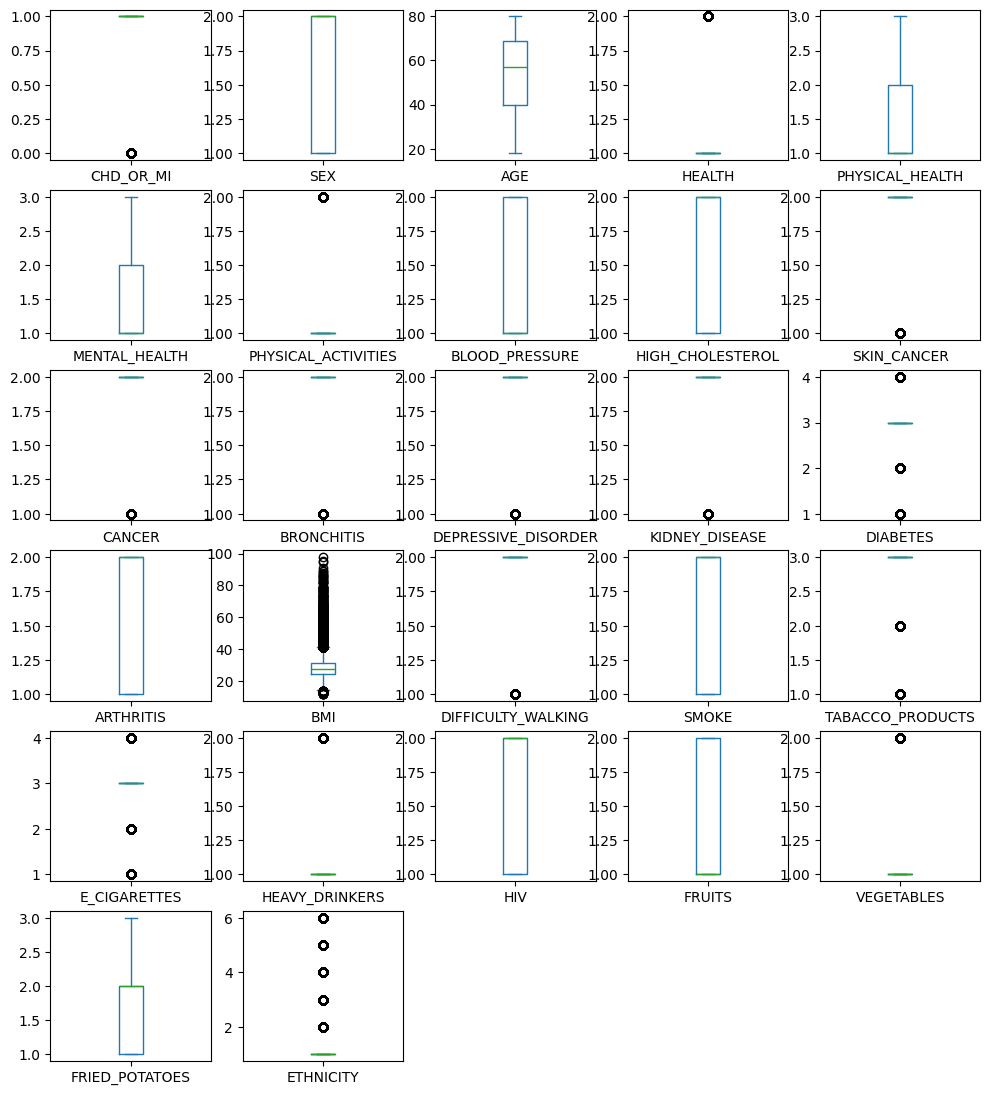

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(7,5), sharex=True, sharey=False,  figsize=[12,16])
plt.show()

In [ ]:
# Todo valor outlier se le asigna el menor/mayor valor no outlier
q1 = df.BMI.quantile(0.25)
q3 = df.BMI.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df.loc[df.BMI>ul, 'BMI'] = ul
df.loc[df.BMI<ll, 'BMI'] = ll

# MODELOS PRELIMINARES

In [189]:
# Cargar libreriras y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  #por defecto las figuras se displayan 10 pulgadas de ancho y 8 de alto

from sklearn.ensemble import AdaBoostClassifier   # Ensamble AdaBoost para regresion
from sklearn.ensemble import GradientBoostingClassifier   # Ensamble Gradient Boosting para regresion
from sklearn.ensemble import RandomForestClassifier   # Ensamble RandomForest para regresion
from sklearn.ensemble import ExtraTreesClassifier     # Ensamble ExtraTrees para regresion

from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn
from sklearn.svm import LinearSVC   # para modelos SVM

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion

results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

algos = []
algos.append(('LR', LogisticRegression(max_iter=1000)))
algos.append(('RandomForest', RandomForestClassifier(n_jobs=4)))
algos.append(('ExtraTrees',ExtraTreesClassifier()))
algos.append(('AdaBoost', AdaBoostClassifier()))
algos.append(('GradientBoosting', GradientBoostingClassifier()))
algos.append(('LinearSVC', LinearSVC()))

In [190]:
X_train = df.iloc[:, 1:28]
Y_train = df.iloc[:, 0]

In [191]:
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, Y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

KeyboardInterrupt: 

In [192]:
results_f1 = []
names_f1 = []

for algoname_f1, algo_f1 in algos:
    cv_results_f1 = cross_val_score(algo_f1, X_train, Y_train, cv=kfold, scoring='f1', n_jobs=-1)
    results_f1.append(cv_results_f1)
    names_f1.append(algoname_f1)
    print("{}: {} ({})".format(algoname_f1, cv_results_f1.mean(), cv_results_f1.std()))

LR: 0.9586923423686672 (0.0015035274626115241)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForest: 0.9575797072087431 (0.0014620991698764997)
ExtraTrees: 0.9550243930351165 (0.0015768749858102115)
AdaBoost: 0.9583191890283163 (0.001364268053594587)
GradientBoosting: 0.9585721754636429 (0.0013055110593665304)
LinearSVC: 0.9586071805233367 (0.0012162023803245275)


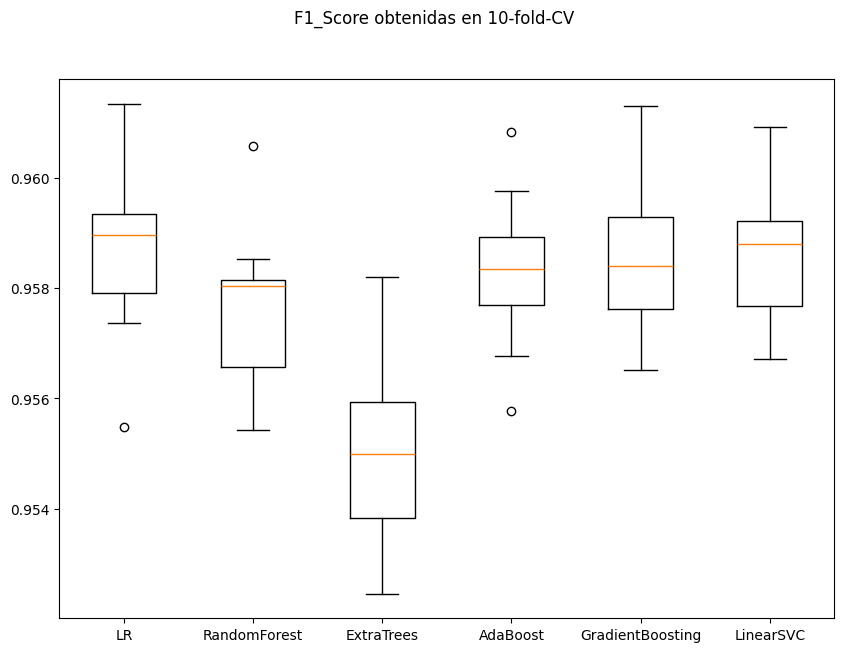

In [201]:
# Comparamos resultados
fig = plt.figure(figsize=[10,7])
fig.suptitle('F1_Score obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names_f1)
plt.show()

In [193]:
df_test_public=pd.read_csv('test_public.csv')
print('Se leyo un dataset de dimensiones {}'.format(df_test_public.shape))
df_test_public.head()

Se leyo un dataset de dimensiones (43406, 28)


,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,1.0,2,70,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_100531
1,1.0,1,32,1.0,3.0,2.0,1.0,1.0,2.0,2.0,...,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1,PID2022_043184
2,1.0,1,69,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,4.0,1.0,2.0,1.0,2.0,1.0,1,PID2022_071971
3,1.0,1,36,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,2,PID2022_070778
4,1.0,1,63,1.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0,1,PID2022_082363


In [194]:
print(df_test_public.shape[0])
print((df_test_public.isnull().sum() / df_test_public.shape[0])*100)

43406
CHD_OR_MI               0.000000
SEX                     0.000000
AGE                     0.000000
HEALTH                  0.258029
PHYSICAL_HEALTH         2.084965
MENTAL_HEALTH           1.769341
PHYSICAL_ACTIVITIES     0.156660
BLOOD_PRESSURE          0.366309
HIGH_CHOLESTEROL       14.343639
SKIN_CANCER             0.223471
CANCER                  0.182002
BRONCHITIS              0.373220
DEPRESSIVE_DISORDER     0.502235
KIDNEY_DISEASE          0.276459
DIABETES                0.105976
ARTHRITIS               0.610515
BMI                    10.565360
DIFFICULTY_WALKING      4.345021
SMOKE                   5.450859
TABACCO_PRODUCTS        5.105285
E_CIGARETTES            5.340276
HEAVY_DRINKERS          7.839930
HIV                    11.643552
FRUITS                 11.247293
VEGETABLES             13.143344
FRIED_POTATOES          9.901857
ETHNICITY               0.000000
ID                      0.000000
dtype: float64


In [195]:
col_id_public = df_test_public['ID']
df_test_public = df_test_public.drop(columns=['ID'])
df_test_public['CHD_OR_MI'] = df_test_public['CHD_OR_MI'].astype(int)
df_test_public['BMI'] = df_test_public['BMI'].fillna(df_test_public['BMI'].median())
df_test_public['HIV'] = df_test_public['HIV'].fillna(df_test_public['HIV'].median())
age_threshold = 55
df_test_public.loc[(df_test_public['AGE'] > age_threshold) & (df_test_public['ARTHRITIS'].isnull()), 'ARTHRITIS'] = 1.0
df_test_public.loc[(df_test_public['AGE'] <= age_threshold) & (df_test_public['ARTHRITIS'].isnull()), 'ARTHRITIS'] = 2.0
df_test_public.loc[(df_test_public['ARTHRITIS'].isin([1.0])) & (df_test_public['DIFFICULTY_WALKING'].isnull()), 'DIFFICULTY_WALKING'] = 1.0
df_test_public.loc[df_test_public['DIFFICULTY_WALKING'].isnull(), 'DIFFICULTY_WALKING'] = 2.0
df_test_public['HEAVY_DRINKERS']=df_test_public['HEAVY_DRINKERS'].fillna(df_test_public['HEAVY_DRINKERS'].median())
df_test_public.loc[(df_test_public['HEAVY_DRINKERS'].isin([2.0]))& df_test_public['BLOOD_PRESSURE'].isnull(),'BLOOD_PRESSURE'] = 2.0

df_test_public['PHYSICAL_HEALTH']=df_test_public['PHYSICAL_HEALTH'].fillna(df_test_public['PHYSICAL_HEALTH'].median())
df_test_public['MENTAL_HEALTH']=df_test_public['MENTAL_HEALTH'].fillna(df_test_public['MENTAL_HEALTH'].median())

df_test_public.loc[(df_test_public['PHYSICAL_HEALTH'].isin([3.0]))& df_test_public['HEALTH'].isnull(),'HEALTH']=2.0
df_test_public.loc[df_test_public['HEALTH'].isnull(),'HEALTH']=1.0
df_test_public['PHYSICAL_ACTIVITIES']=df_test_public['PHYSICAL_ACTIVITIES'].fillna(df_test_public['PHYSICAL_HEALTH'].median())
df_test_public['BLOOD_PRESSURE']=df_test_public['BLOOD_PRESSURE'].fillna(df_test_public['BLOOD_PRESSURE'].median())
df_test_public['HIGH_CHOLESTEROL']=df_test_public['HIGH_CHOLESTEROL'].fillna(df_test_public['HIGH_CHOLESTEROL'].median())
df_test_public['SKIN_CANCER']=df_test_public['SKIN_CANCER'].fillna(df_test_public['SKIN_CANCER'].median())
df_test_public['CANCER']=df_test_public['CANCER'].fillna(df_test_public['CANCER'].median())
df_test_public['BRONCHITIS']=df_test_public['BRONCHITIS'].fillna(df_test_public['BRONCHITIS'].median())
df_test_public['KIDNEY_DISEASE']=df_test_public['KIDNEY_DISEASE'].fillna(df_test_public['KIDNEY_DISEASE'].median())
df_test_public['DIABETES']=df_test_public['DIABETES'].fillna(df_test_public['DIABETES'].median())
df_test_public.loc[(df_test_public['MENTAL_HEALTH'].isin([3.0]))& df_test_public['DEPRESSIVE_DISORDER'].isnull(),'DEPRESSIVE_DISORDER'] = 1.0
df_test_public.loc[df_test_public['DEPRESSIVE_DISORDER'].isnull(),'DEPRESSIVE_DISORDER'] = 2.0
df_test_public.loc[(df_test_public['BRONCHITIS'].isin([1.0]))& df_test_public['SMOKE'].isnull(),'SMOKE'] = 1.0
df_test_public.loc[df_test_public['SMOKE'].isnull(),'SMOKE'] = 2.0
df_test_public['TABACCO_PRODUCTS']=df_test_public['TABACCO_PRODUCTS'].fillna(df_test_public['TABACCO_PRODUCTS'].median())
df_test_public['E_CIGARETTES']=df_test_public['E_CIGARETTES'].fillna(df_test_public['E_CIGARETTES'].median())

df_test_public.loc[(df_test_public['VEGETABLES'].isin([1.0]))& df_test_public['FRUITS'].isnull(),'FRUITS'] = 1
df_test_public.loc[(df_test_public['VEGETABLES'].isnull() | df_test_public['VEGETABLES'].isin([2.0])) & df_test_public['FRUITS'].isnull(), 'FRUITS'] = 2

df_test_public.loc[(df_test_public['FRUITS'].isin([1.0]))& df_test_public['VEGETABLES'].isnull(),'VEGETABLES'] = 1
df_test_public.loc[(df_test_public['FRUITS'].isnull() | df_test_public['FRUITS'].isin([2.0]))& df_test_public['VEGETABLES'].isnull(), 'VEGETABLES'] = 2

df_test_public['FRIED_POTATOES'] = df_test_public['FRIED_POTATOES'].fillna(df_test_public['FRIED_POTATOES'].median())



In [196]:
df_test_public['HEALTH'] = df_test_public['HEALTH'].astype(int)
df_test_public['PHYSICAL_HEALTH'] = df_test_public['PHYSICAL_HEALTH'].astype(int)
df_test_public['MENTAL_HEALTH'] = df_test_public['MENTAL_HEALTH'].astype(int)
df_test_public['BLOOD_PRESSURE'] = df_test_public['BLOOD_PRESSURE'].astype(int)
df_test_public['HIGH_CHOLESTEROL'] = df_test_public['HIGH_CHOLESTEROL'].astype(int)
df_test_public['PHYSICAL_ACTIVITIES'] = df_test_public['PHYSICAL_ACTIVITIES'].astype(int)
df_test_public['SKIN_CANCER'] = df_test_public['SKIN_CANCER'].astype(int)
df_test_public['CANCER'] = df_test_public['CANCER'].astype(int)
df_test_public['BRONCHITIS'] = df_test_public['BRONCHITIS'].astype(int)
df_test_public['DEPRESSIVE_DISORDER'] = df_test_public['DEPRESSIVE_DISORDER'].astype(int)
df_test_public['KIDNEY_DISEASE'] = df_test_public['KIDNEY_DISEASE'].astype(int)
df_test_public['DIABETES'] = df_test_public['DIABETES'].astype(int)
df_test_public['ARTHRITIS'] = df_test_public['ARTHRITIS'].astype(int)
df_test_public['DIFFICULTY_WALKING'] = df_test_public['DIFFICULTY_WALKING'].astype(int)
df_test_public['SMOKE'] = df_test_public['SMOKE'].astype(int)
df_test_public['TABACCO_PRODUCTS'] = df_test_public['TABACCO_PRODUCTS'].astype(int)
df_test_public['E_CIGARETTES'] = df_test_public['E_CIGARETTES'].astype(int)
df_test_public['HEAVY_DRINKERS'] = df_test_public['HEAVY_DRINKERS'].astype(int)
df_test_public['HIV'] = df_test_public['HIV'].astype(int)
df_test_public['FRUITS'] = df_test_public['FRUITS'].astype(int)
df_test_public['VEGETABLES'] = df_test_public['VEGETABLES'].astype(int)
df_test_public['FRIED_POTATOES'] = df_test_public['FRIED_POTATOES'].astype(int)

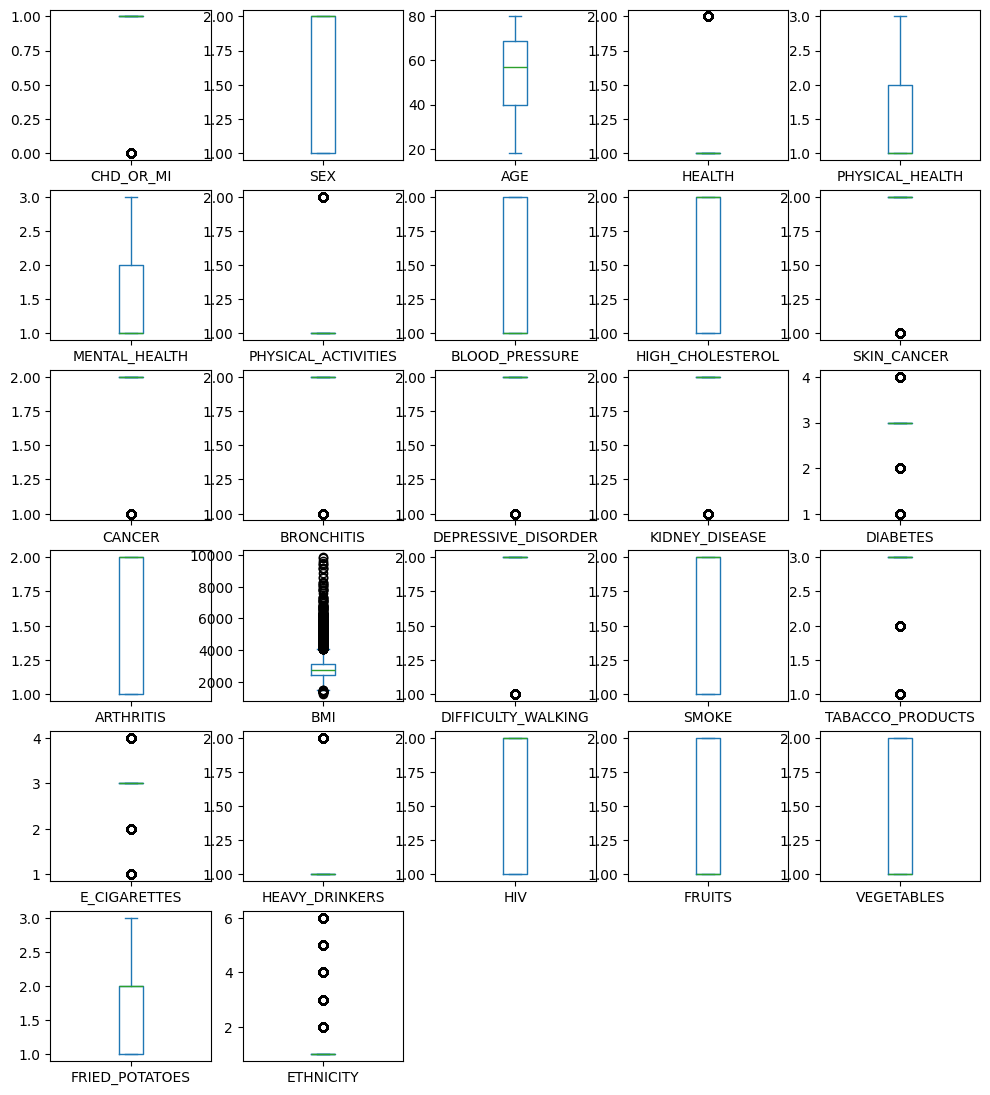

In [197]:
df_test_public.plot(kind='box', subplots=True, layout=(7,5), sharex=True, sharey=False,  figsize=[12,16])
plt.show()

In [198]:
q1 = df_test_public.BMI.quantile(0.25)
q3 = df_test_public.BMI.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df_test_public.loc[df_test_public.BMI>ul, 'BMI'] = ul
df_test_public.loc[df_test_public.BMI<ll, 'BMI'] = ll

In [199]:
X_valid = df_test_public.iloc[:, 1:28]
Y_valid = df_test_public.iloc[:, 0]

# OPTIMIZACIÓN

Probamos los 3 mejores

In [203]:
model_logical = LogisticRegression(max_iter=100)
model_logical.fit(X_train, Y_train)


# predice el target en el conjunto de validacion
Y_predicted = model_logical.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9575888568683958
Matriz de Confusión:
[[    0  3532]
 [    0 39874]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3532
           1       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.46      0.50      0.48     43406
weighted avg       0.84      0.92      0.88     43406



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [204]:
model_svc = LinearSVC(max_iter=100)
model_svc.fit(X_train, Y_train)


# predice el target en el conjunto de validacion
Y_predicted = model_svc.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9575888568683958
Matriz de Confusión:
[[    0  3532]
 [    0 39874]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3532
           1       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.46      0.50      0.48     43406
weighted avg       0.84      0.92      0.88     43406



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [205]:
model_boost = GradientBoostingClassifier(random_state=7,n_estimators=150, max_depth= 3)
model_boost.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model_boost.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9580719868763872
Matriz de Confusión:
[[  216  3316]
 [  160 39714]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.57      0.06      0.11      3532
           1       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.75      0.53      0.53     43406
weighted avg       0.89      0.92      0.89     43406



## PROBANDO PARÁMETROS GRADIENT BOOSTING

In [ ]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model1 = GradientBoostingClassifier(random_state=7,n_estimators=100, max_depth= 5)
model1.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model1.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9579657498702646
Matriz de Confusión:
[[  234  3298]
 [  185 39689]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

         0.0       0.56      0.07      0.12      3532
         1.0       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.74      0.53      0.54     43406
weighted avg       0.89      0.92      0.89     43406



In [322]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model2 = GradientBoostingClassifier(random_state=7,n_estimators=50, max_depth= 5)
model2.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model2.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.957854221214059
Matriz de Confusión:
[[  220  3312]
 [  181 39693]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.55      0.06      0.11      3532
           1       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.74      0.53      0.53     43406
weighted avg       0.89      0.92      0.89     43406



In [ ]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model3 = GradientBoostingClassifier(random_state=7,n_estimators=100, max_depth= 3)
model3.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model3.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9578858452998673
Matriz de Confusión:
[[  226  3306]
 [  184 39690]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

         0.0       0.55      0.06      0.11      3532
         1.0       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.74      0.53      0.54     43406
weighted avg       0.89      0.92      0.89     43406



In [315]:
# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model4 = GradientBoostingClassifier(random_state=7,n_estimators=100, max_depth= 10)
model4.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model4.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9538543741195901
Matriz de Confusión:
[[  332  3200]
 [  600 39274]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.36      0.09      0.15      3532
           1       0.92      0.98      0.95     39874

    accuracy                           0.91     43406
   macro avg       0.64      0.54      0.55     43406
weighted avg       0.88      0.91      0.89     43406



In [324]:
model5 = GradientBoostingClassifier(min_samples_split=5, min_samples_leaf=10, learning_rate=0.07, random_state=7,n_estimators=150, max_depth=10)
model5.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model5.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9559026516527425
Matriz de Confusión:
[[  290  3242]
 [  400 39474]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.42      0.08      0.14      3532
           1       0.92      0.99      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.67      0.54      0.55     43406
weighted avg       0.88      0.92      0.89     43406



In [313]:
model6 = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=2, random_state=7,n_estimators=150, max_depth= 3)
model6.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model6.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9579334902528819
Matriz de Confusión:
[[  241  3291]
 [  194 39680]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.55      0.07      0.12      3532
           1       0.92      1.00      0.96     39874

    accuracy                           0.92     43406
   macro avg       0.74      0.53      0.54     43406
weighted avg       0.89      0.92      0.89     43406



## BALANCEANDO DATOS

SAMPLE_WEIGHTS

In [206]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcular los pesos para las muestras
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

# Entrenar el modelo con los pesos
model7 = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=4, random_state=7,n_estimators=150, max_depth= 3)
model7.fit(X_train, Y_train, sample_weight=sample_weights)

# predice el target en el conjunto de validacion
Y_predicted = model7.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.8372272805359904
Matriz de Confusión:
[[ 2795   737]
 [10633 29241]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.21      0.79      0.33      3532
           1       0.98      0.73      0.84     39874

    accuracy                           0.74     43406
   macro avg       0.59      0.76      0.58     43406
weighted avg       0.91      0.74      0.80     43406



In [207]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcular los pesos para las muestras
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

# Entrenar el modelo con los pesos
model8 = GradientBoostingClassifier(min_samples_split=3, min_samples_leaf=5, random_state=7,n_estimators=150, max_depth=10)
model8.fit(X_train, Y_train, sample_weight=sample_weights)

# predice el target en el conjunto de validacion
Y_predicted = model8.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9271835431004981
Matriz de Confusión:
[[ 1085  2447]
 [ 3298 36576]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.25      0.31      0.27      3532
           1       0.94      0.92      0.93     39874

    accuracy                           0.87     43406
   macro avg       0.59      0.61      0.60     43406
weighted avg       0.88      0.87      0.87     43406



In [331]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcular los pesos para las muestras
sample_weights = compute_sample_weight(class_weight='balanced', y=Y_train)

# Entrenar el modelo con los pesos
model8_editado = GradientBoostingClassifier(min_samples_split=3, min_samples_leaf=10, learning_rate=0.07, random_state=7,n_estimators=150, max_depth=10)
model8_editado.fit(X_train, Y_train, sample_weight=sample_weights)

# predice el target en el conjunto de validacion
Y_predicted = model8_editado.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9154371796862867
Matriz de Confusión:
[[ 1505  2027]
 [ 4507 35367]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.25      0.43      0.32      3532
           1       0.95      0.89      0.92     39874

    accuracy                           0.85     43406
   macro avg       0.60      0.66      0.62     43406
weighted avg       0.89      0.85      0.87     43406



SMOTE

In [211]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para generar muestras de la clase minoritaria
smote = SMOTE(random_state=7)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Entrenar el modelo con los datos balanceados
model9 = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=2,random_state=7,n_estimators=150, max_depth=3)
model9.fit(X_train_resampled, Y_train_resampled)

# predice el target en el conjunto de validacion
Y_predicted = model9.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


F1 score: 0.8939958481928993
Matriz de Confusión:
[[ 1849  1683]
 [ 6283 33591]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.23      0.52      0.32      3532
           1       0.95      0.84      0.89     39874

    accuracy                           0.82     43406
   macro avg       0.59      0.68      0.61     43406
weighted avg       0.89      0.82      0.85     43406



In [213]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para generar muestras de la clase minoritaria
smote = SMOTE(random_state=7)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Entrenar el modelo con los datos balanceados
model10 = GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=2,learning_rate=0.05, random_state=7,n_estimators=150, max_depth=3)
model10.fit(X_train_resampled, Y_train_resampled)

# predice el target en el conjunto de validacion
Y_predicted = model10.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


F1 score: 0.8836104513064132
Matriz de Confusión:
[[ 2046  1486]
 [ 7138 32736]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.22      0.58      0.32      3532
           1       0.96      0.82      0.88     39874

    accuracy                           0.80     43406
   macro avg       0.59      0.70      0.60     43406
weighted avg       0.90      0.80      0.84     43406



In [215]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para generar muestras de la clase minoritaria
smote = SMOTE(random_state=7)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Entrenar el modelo con los datos balanceados
model11 = GradientBoostingClassifier(min_samples_split=3, min_samples_leaf=5,learning_rate=0.05, random_state=7,n_estimators=150, max_depth=5)
model11.fit(X_train_resampled, Y_train_resampled)

# predice el target en el conjunto de validacion
Y_predicted = model11.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


F1 score: 0.8936628998123228
Matriz de Confusión:
[[ 1847  1685]
 [ 6304 33570]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.23      0.52      0.32      3532
           1       0.95      0.84      0.89     39874

    accuracy                           0.82     43406
   macro avg       0.59      0.68      0.60     43406
weighted avg       0.89      0.82      0.85     43406



In [170]:
from sklearn.model_selection import GridSearchCV

smote = SMOTE(random_state=7)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

param_grid = {
    'learning_rate': [0.05, 0.07, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [2, 3, 5, 10,15]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=7), param_grid, scoring='f1', cv=1, verbose=1,n_jobs=-1)
grid_search.fit(X_train_resampled, Y_train_resampled)

best_model_searched = grid_search.best_estimator_

# predice el target en el conjunto de validacion
Y_predicted = best_model_searched.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 2 folds for each of 540 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [216]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=7)
X_train_resampled, Y_train_resampled = smoteenn.fit_resample(X_train, Y_train)

# Entrenar el modelo con los datos balanceados
model11_editado = GradientBoostingClassifier(min_samples_split=3, min_samples_leaf=2,learning_rate=0.05, random_state=7,n_estimators=150, max_depth=5)
model11_editado.fit(X_train_resampled, Y_train_resampled)

# predice el target en el conjunto de validacion
Y_predicted = model11_editado.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

F1 score: 0.8611057225994181
Matriz de Confusión:
[[ 2309  1223]
 [ 8801 31073]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.21      0.65      0.32      3532
           1       0.96      0.78      0.86     39874

    accuracy                           0.77     43406
   macro avg       0.58      0.72      0.59     43406
weighted avg       0.90      0.77      0.82     43406



## XGBOOST


In [218]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model14 = XGBClassifier(scale_pos_weight=ratio, random_state=7)
model14.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model14.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.8665146804835924
Matriz de Confusión:
[[ 2388  1144]
 [ 8517 31357]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.22      0.68      0.33      3532
           1       0.96      0.79      0.87     39874

    accuracy                           0.78     43406
   macro avg       0.59      0.73      0.60     43406
weighted avg       0.90      0.78      0.82     43406



In [219]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model15 = XGBClassifier(learning_rate=0.05,max_depth=20,n_estimators=250, scale_pos_weight=ratio-0.01, random_state=7)
model15.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model15.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9161157937116067
Matriz de Confusión:
[[ 1677  1855]
 [ 4604 35270]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.27      0.47      0.34      3532
           1       0.95      0.88      0.92     39874

    accuracy                           0.85     43406
   macro avg       0.61      0.68      0.63     43406
weighted avg       0.89      0.85      0.87     43406



In [220]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model16 = XGBClassifier(learning_rate=0.02,max_depth=15,n_estimators=250, scale_pos_weight=ratio, random_state=7)
model16.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model16.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.8900835999032284
Matriz de Confusión:
[[ 2116  1416]
 [ 6762 33112]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.24      0.60      0.34      3532
           1       0.96      0.83      0.89     39874

    accuracy                           0.81     43406
   macro avg       0.60      0.71      0.62     43406
weighted avg       0.90      0.81      0.85     43406



In [272]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model17 = XGBClassifier(learning_rate=0.05,max_depth=20,n_estimators=200, scale_pos_weight=ratio+0.06, random_state=7)
model17.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model17.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9365716226244231
Matriz de Confusión:
[[ 1131  2401]
 [ 2642 37232]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.30      0.32      0.31      3532
           1       0.94      0.93      0.94     39874

    accuracy                           0.88     43406
   macro avg       0.62      0.63      0.62     43406
weighted avg       0.89      0.88      0.89     43406



In [296]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model18 = XGBClassifier(learning_rate=0.08,max_depth=15,n_estimators=150, scale_pos_weight=ratio+0.07, random_state=7)
model18.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model18.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9371923656454043
Matriz de Confusión:
[[ 1085  2447]
 [ 2555 37319]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.30      0.31      0.30      3532
           1       0.94      0.94      0.94     39874

    accuracy                           0.88     43406
   macro avg       0.62      0.62      0.62     43406
weighted avg       0.89      0.88      0.89     43406



In [309]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos
#XGBClassifier(learning_rate=0.08,max_depth=15,n_estimators=150, scale_pos_weight=ratio+0.08, random_state=7)
model19 = XGBClassifier(learning_rate=0.005,max_depth=15,n_estimators=150, scale_pos_weight=ratio+0.09, random_state=7)
model19.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model19.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

F1 score: 0.9499630450849963
Matriz de Confusión:
[[  785  2747]
 [ 1315 38559]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.37      0.22      0.28      3532
           1       0.93      0.97      0.95     39874

    accuracy                           0.91     43406
   macro avg       0.65      0.59      0.61     43406
weighted avg       0.89      0.91      0.90     43406



## CATBOOST

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


In [246]:
from catboost import CatBoostClassifier, Pool
from imblearn.combine import SMOTEENN
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import pandas as pd

X_train_data = pd.DataFrame(X_train)

categorical_features = [
    "SEX",
    "HEALTH",
    "PHYSICAL_HEALTH",
    "MENTAL_HEALTH",
    "PHYSICAL_ACTIVITIES",
    "BLOOD_PRESSURE",
    "HIGH_CHOLESTEROL",
    "SKIN_CANCER",
    "CANCER",
    "BRONCHITIS",
    "DEPRESSIVE_DISORDER",
    "KIDNEY_DISEASE",
    "DIABETES",
    "ARTHRITIS",
    "DIFFICULTY_WALKING",
    "SMOKE",
    "TABACCO_PRODUCTS",
    "E_CIGARETTES",
    "HEAVY_DRINKERS",
    "HIV",
    "FRUITS",
    "VEGETABLES",
    "FRIED_POTATOES",
    "ETHNICITY"
]

smoteenn = SMOTEENN(random_state=7)

X_train_resampled_cat, Y_train_resampled_cat = smoteenn.fit_resample(X_train_data, Y_train)
X_train_resampled_cat = pd.DataFrame(X_train_resampled_cat, columns=X_train_data.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [252]:
train_pool = Pool(data=X_train_resampled_cat,
                  label=Y_train_resampled_cat,
                  cat_features=categorical_features)
valid_pool = Pool(data=X_valid,
                  label=Y_valid,
                  cat_features=categorical_features)
cat_model1 = CatBoostClassifier(iterations=300, learning_rate=0.07, depth=15, random_seed=7, verbose=100)
cat_model1.fit(X_train_resampled_cat, Y_train_resampled_cat, eval_set=(X_valid, Y_valid))

Y_pred_cat = cat_model1.predict(X_valid)
print("F1 score:", f1_score(Y_valid, Y_pred_cat))

print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_pred_cat))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_pred_cat))

0:	learn: 0.6050723	test: 0.6463496	best: 0.6463496 (0)	total: 1.86s	remaining: 9m 15s
100:	learn: 0.1039575	test: 0.5494912	best: 0.5118194 (12)	total: 2m 38s	remaining: 5m 12s
200:	learn: 0.0622181	test: 0.5683900	best: 0.5118194 (12)	total: 5m 2s	remaining: 2m 28s
299:	learn: 0.0421186	test: 0.5951594	best: 0.5118194 (12)	total: 7m 23s	remaining: 0us

bestTest = 0.5118194398
bestIteration = 12

Shrink model to first 13 iterations.
F1 score: 0.844946039359526
Matriz de Confusión:
[[ 2468  1064]
 [ 9927 29947]]
Reporte de clasificacion en conjunto de validacion:
              precision    recall  f1-score   support

           0       0.20      0.70      0.31      3532
           1       0.97      0.75      0.84     39874

    accuracy                           0.75     43406
   macro avg       0.58      0.72      0.58     43406
weighted avg       0.90      0.75      0.80     43406



# ELECCIÓN Y PREDICCIÓN FINAL

Se elige el modelo basado en XGBoost (modelo 18) porque ofrece un mejor balance entre la detección de la clase minoritaria (clase 0) y el rendimiento general del modelo. Aunque tiene una ligera disminución en la precisión general y el F1-score ponderado, mejora significativamente la capacidad de identificar casos críticos de la clase 0, lo cual es crucial si esta clase representa situaciones sensibles en el problema a resolver. Debajo se adjunta el código del modelo.

In [ ]:
from xgboost import XGBClassifier

n_negativos = sum(Y_train == 0)
n_positivos = sum(Y_train == 1)
ratio = n_negativos / n_positivos

model18 = XGBClassifier(learning_rate=0.08,max_depth=15,n_estimators=150, scale_pos_weight=ratio+0.07, random_state=7)
model18.fit(X_train, Y_train)

# predice el target en el conjunto de validacion
Y_predicted = model18.predict(X_valid)

print("F1 score:", f1_score(Y_valid, Y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("Matriz de Confusión:")
print(confusion_matrix(Y_valid, Y_predicted))

# muestra un reporte de la clasificacion en validacion
print("Reporte de clasificacion en conjunto de validacion:")
print(classification_report(Y_valid, Y_predicted))

In [253]:
df_test_private=pd.read_csv('test_private.csv')
print('Se leyo un dataset de dimensiones {}'.format(df_test_private.shape))
df_test_private.head()

Se leyo un dataset de dimensiones (43406, 27)


,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,2,56,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,...,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1,PID2022_152435
1,2,59,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,4.0,1.0,2.0,2.0,2.0,1.0,1,PID2022_299594
2,2,30,1.0,1.0,2.0,2.0,1.0,NaN,2.0,2.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_065147
3,2,29,2.0,2.0,1.0,1.0,1.0,NaN,2.0,1.0,...,2.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,2,PID2022_333651
4,2,43,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1,PID2022_317306


In [254]:
col_id_private = df_test_private['ID']
df_test_private = df_test_private.drop(columns=['ID'])
df_test_private['BMI'] = df_test_private['BMI'].fillna(df_test_private['BMI'].median())
df_test_private['HIV'] = df_test_private['HIV'].fillna(df_test_private['HIV'].median())
age_threshold = 55
df_test_private.loc[(df_test_private['AGE'] > age_threshold) & (df_test_private['ARTHRITIS'].isnull()), 'ARTHRITIS'] = 1.0
df_test_private.loc[(df_test_private['AGE'] <= age_threshold) & (df_test_private['ARTHRITIS'].isnull()), 'ARTHRITIS'] = 2.0
df_test_private.loc[(df_test_private['ARTHRITIS'].isin([1.0])) & (df_test_private['DIFFICULTY_WALKING'].isnull()), 'DIFFICULTY_WALKING'] = 1.0
df_test_private.loc[df_test_private['DIFFICULTY_WALKING'].isnull(), 'DIFFICULTY_WALKING'] = 2.0
df_test_private['HEAVY_DRINKERS'] = df_test_private['HEAVY_DRINKERS'].fillna(df_test_private['HEAVY_DRINKERS'].median())
df_test_private.loc[(df_test_private['HEAVY_DRINKERS'].isin([2.0])) & df_test_private['BLOOD_PRESSURE'].isnull(), 'BLOOD_PRESSURE'] = 2.0

df_test_private['PHYSICAL_HEALTH'] = df_test_private['PHYSICAL_HEALTH'].fillna(df_test_private['PHYSICAL_HEALTH'].median())
df_test_private['MENTAL_HEALTH'] = df_test_private['MENTAL_HEALTH'].fillna(df_test_private['MENTAL_HEALTH'].median())

df_test_private.loc[(df_test_private['PHYSICAL_HEALTH'].isin([3.0])) & df_test_private['HEALTH'].isnull(), 'HEALTH'] = 2.0
df_test_private.loc[df_test_private['HEALTH'].isnull(), 'HEALTH'] = 1.0
df_test_private['PHYSICAL_ACTIVITIES'] = df_test_private['PHYSICAL_ACTIVITIES'].fillna(df_test_private['PHYSICAL_HEALTH'].median())
df_test_private['BLOOD_PRESSURE'] = df_test_private['BLOOD_PRESSURE'].fillna(df_test_private['BLOOD_PRESSURE'].median())
df_test_private['HIGH_CHOLESTEROL'] = df_test_private['HIGH_CHOLESTEROL'].fillna(df_test_private['HIGH_CHOLESTEROL'].median())
df_test_private['SKIN_CANCER'] = df_test_private['SKIN_CANCER'].fillna(df_test_private['SKIN_CANCER'].median())
df_test_private['CANCER'] = df_test_private['CANCER'].fillna(df_test_private['CANCER'].median())
df_test_private['BRONCHITIS'] = df_test_private['BRONCHITIS'].fillna(df_test_private['BRONCHITIS'].median())
df_test_private['KIDNEY_DISEASE'] = df_test_private['KIDNEY_DISEASE'].fillna(df_test_private['KIDNEY_DISEASE'].median())
df_test_private['DIABETES'] = df_test_private['DIABETES'].fillna(df_test_private['DIABETES'].median())
df_test_private.loc[(df_test_private['MENTAL_HEALTH'].isin([3.0])) & df_test_private['DEPRESSIVE_DISORDER'].isnull(), 'DEPRESSIVE_DISORDER'] = 1.0
df_test_private.loc[df_test_private['DEPRESSIVE_DISORDER'].isnull(), 'DEPRESSIVE_DISORDER'] = 2.0
df_test_private.loc[(df_test_private['BRONCHITIS'].isin([1.0])) & df_test_private['SMOKE'].isnull(), 'SMOKE'] = 1.0
df_test_private.loc[df_test_private['SMOKE'].isnull(), 'SMOKE'] = 2.0
df_test_private['TABACCO_PRODUCTS'] = df_test_private['TABACCO_PRODUCTS'].fillna(df_test_private['TABACCO_PRODUCTS'].median())
df_test_private['E_CIGARETTES'] = df_test_private['E_CIGARETTES'].fillna(df_test_private['E_CIGARETTES'].median())

df_test_private.loc[(df_test_private['VEGETABLES'].isin([1.0])) & df_test_private['FRUITS'].isnull(), 'FRUITS'] = 1
df_test_private.loc[(df_test_private['VEGETABLES'].isnull() | df_test_private['VEGETABLES'].isin([2.0])) & df_test_private['FRUITS'].isnull(), 'FRUITS'] = 2

df_test_private.loc[(df_test_private['FRUITS'].isin([1.0])) & df_test_private['VEGETABLES'].isnull(), 'VEGETABLES'] = 1
df_test_private.loc[(df_test_private['FRUITS'].isnull() | df_test_private['FRUITS'].isin([2.0])) & df_test_private['VEGETABLES'].isnull(), 'VEGETABLES'] = 2

df_test_private['FRIED_POTATOES'] = df_test_private['FRIED_POTATOES'].fillna(df_test_private['FRIED_POTATOES'].median())


In [255]:
#corregimos las variables para que sean int
df_test_private['HEALTH'] = df_test_private['HEALTH'].astype(int)
df_test_private['PHYSICAL_HEALTH'] = df_test_private['PHYSICAL_HEALTH'].astype(int)
df_test_private['MENTAL_HEALTH'] = df_test_private['MENTAL_HEALTH'].astype(int)
df_test_private['BLOOD_PRESSURE'] = df_test_private['BLOOD_PRESSURE'].astype(int)
df_test_private['HIGH_CHOLESTEROL'] = df_test_private['HIGH_CHOLESTEROL'].astype(int)
df_test_private['PHYSICAL_ACTIVITIES'] = df_test_private['PHYSICAL_ACTIVITIES'].astype(int)
df_test_private['SKIN_CANCER'] = df_test_private['SKIN_CANCER'].astype(int)
df_test_private['CANCER'] = df_test_private['CANCER'].astype(int)
df_test_private['BRONCHITIS'] = df_test_private['BRONCHITIS'].astype(int)
df_test_private['DEPRESSIVE_DISORDER'] = df_test_private['DEPRESSIVE_DISORDER'].astype(int)
df_test_private['KIDNEY_DISEASE'] = df_test_private['KIDNEY_DISEASE'].astype(int)
df_test_private['DIABETES'] = df_test_private['DIABETES'].astype(int)
df_test_private['ARTHRITIS'] = df_test_private['ARTHRITIS'].astype(int)
df_test_private['DIFFICULTY_WALKING'] = df_test_private['DIFFICULTY_WALKING'].astype(int)
df_test_private['SMOKE'] = df_test_private['SMOKE'].astype(int)
df_test_private['TABACCO_PRODUCTS'] = df_test_private['TABACCO_PRODUCTS'].astype(int)
df_test_private['E_CIGARETTES'] = df_test_private['E_CIGARETTES'].astype(int)
df_test_private['HEAVY_DRINKERS'] = df_test_private['HEAVY_DRINKERS'].astype(int)
df_test_private['HIV'] = df_test_private['HIV'].astype(int)
df_test_private['FRUITS'] = df_test_private['FRUITS'].astype(int)
df_test_private['VEGETABLES'] = df_test_private['VEGETABLES'].astype(int)
df_test_private['FRIED_POTATOES'] = df_test_private['FRIED_POTATOES'].astype(int)

In [256]:
(df_test_private.isnull().sum() / df_test_private.shape[0])*100

,0
SEX,0.0
AGE,0.0
HEALTH,0.0
PHYSICAL_HEALTH,0.0
MENTAL_HEALTH,0.0
PHYSICAL_ACTIVITIES,0.0
BLOOD_PRESSURE,0.0
HIGH_CHOLESTEROL,0.0
SKIN_CANCER,0.0
CANCER,0.0


In [325]:
q1 = df.BMI.quantile(0.25)
q3 = df.BMI.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df_test_private.loc[df_test_private.BMI>ul, 'BMI'] = ul
df_test_private.loc[df_test_private.BMI<ll, 'BMI'] = ll

In [328]:
X_private = df_test_private.iloc[:, 0:27]
Y_predicted_private = model5.predict(X_private)

In [329]:
#dataset final
df_public=pd.DataFrame({
    'ID': col_id_public,
    'CHD_OR_MI': Y_predicted
})
df_private = pd.DataFrame({
    'ID': col_id_private,
    'CHD_OR_MI': Y_predicted_private
})

# Combinar los DataFrames
df_final = pd.concat([df_public, df_private], ignore_index=True)



In [330]:
df_final.to_csv('resultados.csv', index=False)